In [7]:
import PyCC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [6, 4]

plot_pretty()

In [8]:
Rvir = 2000000
c = 10
p0 = 10
n_parts = 1000

In [9]:
test_dist = PyCC.Distributions.NFW(Rvir=Rvir,c=c,p0=p0,n=n_parts)
vectors = PyCC.random_vectors(10)
xs = []
ys = []

In [10]:
for vec in vectors:
    ray = PyCC.ray(vec,Rvir*2,25)
    out,stats = PyCC.evaluate(df=test_dist,evaluate_at=ray,save=False,algo="directsum")
    phis = out.loc[:,"phi"].to_numpy()
    positions = out.loc[:,["x","y","z"]]
    rs = PyCC.points2radius(positions)
    xs.append(rs)
    ys.append(phis)

In [11]:
ana_ray = PyCC.ray(np.array([1,0,0]),Rvir*2,100)
ana_rs = PyCC.points2radius(ana_ray)
analytics = PyCC.Analytic.NFW(Rvir=Rvir,c=c,p0=p0,positions=ana_ray)

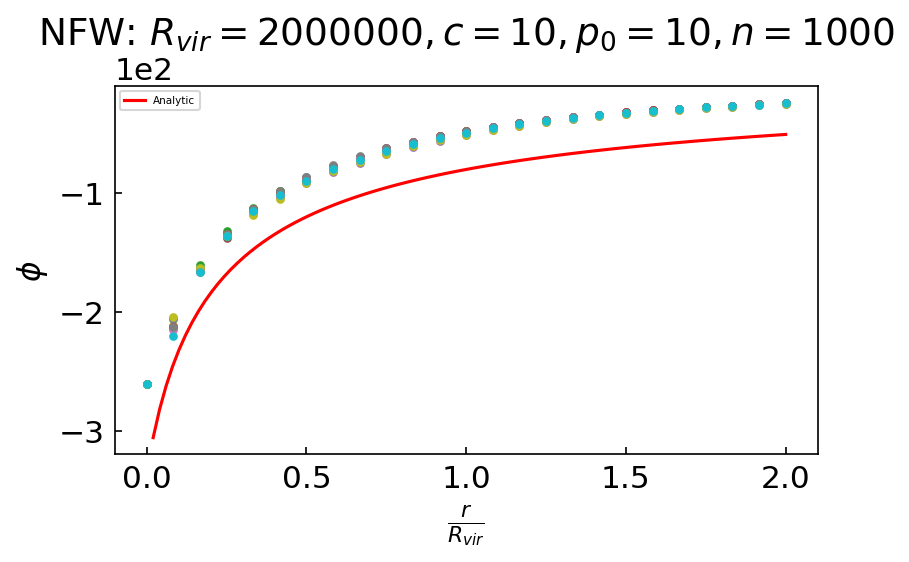

In [12]:
for x,y in zip(xs,ys):
    plt.scatter(x/Rvir,y,zorder=0,s=10)
plt.plot(ana_rs/Rvir,analytics,color="red",zorder=1,label="Analytic")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel(r"$\phi$")
plt.xlabel(r"$\frac{r}{R_{vir}}$")
plt.title("NFW: " + r"$R_{vir}=" + str(Rvir) + r",c=" + str(c) + r",p_0=" + str(p0) + r",n=" + str(n_parts) + r"$",pad=20)
plt.legend()
plt.tight_layout()
plt.savefig("NFW Plot2.jpg")
plt.show()